## Design Backward Induction for the Simplified Soccer Case

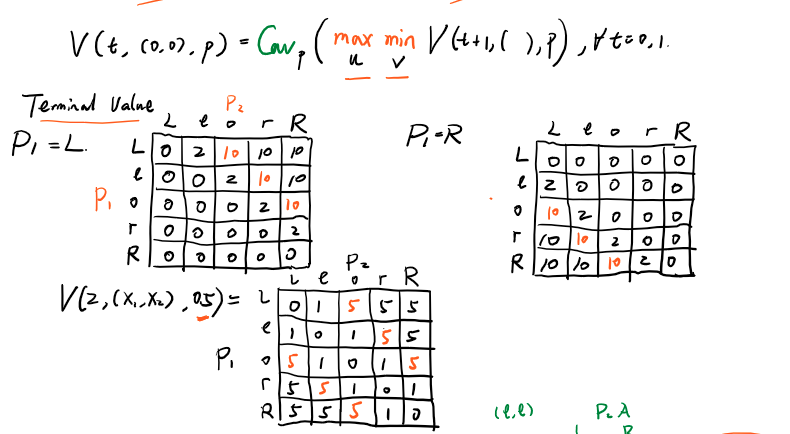

In [2]:
import numpy as np

In [20]:
import matplotlib.pyplot as plt

In [3]:
# Helper function to print the payoff table
def printMatrix(s):

    # Do heading
    print("     ", end="")
    for j in range(len(s[0])):
        print("%5s " % j, end="")
    print()
    print("     ", end="")
    for j in range(len(s[0])):
        print("------", end="")
    print()
    # Matrix contents
    for i in range(len(s)):
        print("%3s |" % (i), end="") # Row nums
        for j in range(len(s[0])):
            print("%5s " % (s[i][j]), end="")
        print()

In [4]:
# states, types, and actions
states = ['L', 'l', 'O', 'r', 'R']
types = ['L', 'R']
actions = ['L', 'R']

In [5]:
# final value for type R
val_L_T = np.zeros((len(states), len(states)))
val_L_T[np.triu_indices(5, k=1)] = 2
val_L_T[np.triu_indices(5, k=2)] = 10

# final value for type L
val_R_T = val_L_T.T

In [6]:
# get some numbers for easier calculations
import itertools

a_pairs = itertools.product(states, repeat=2)
a_pairs = np.array(list(a_pairs))    

In [7]:
a_pairs = np.array([[''.join(a_pairs[i, :]) for i in range(len(a_pairs))]]) # make array of action pairs

In [8]:
a_pairs = a_pairs.reshape(5, 5)

## Define a function to get value at some time t and probability p

In [9]:
def get_av_val(val_a, val_b, p):
    return p*val_b + (1-p)*val_a

In [158]:
def get_prev_val(game_dict, s): # game dict maps states --> payoff | s - states in grid
    temp = np.full(s.shape, np.nan)
    action = np.full(s.shape, '%', dtype=str)
    a_map = {'0': 'L', '1': 'R'}
    for i in range(1, 4):
        payoff = np.zeros((2, 2)) # payoff matrix for the game
        payoff[0, 0] = game_dict[s[0, i-1]] # left left 
        payoff[1, 0] = game_dict[s[4, i-1]] # right left
        payoff[0, 1] = game_dict[s[0, i+1]] # left right
        payoff[1, 1] = game_dict[s[4, i+1]] # right right
        
        # now find maximin
        temp[1, i] = np.max(np.min(payoff, 1))
        action_idx = np.where(np.min(payoff, 1) == np.max(np.min(payoff, 1)))[0]
        action[1, i] = a_map[str(action_idx[0])] if len(action_idx) == 1 else 'A'
    
    temp[2:4, 1:4] = temp[1, 1:4] # symmetric 
    action[2:4, 1:4] = action[1, 1:4]
    
    
    return temp, action

In [159]:
def get_ini_val(game_dict, s):
    temp = np.full(s.shape, np.nan)
    action = np.full(s.shape, '%', dtype=str)
    a_map = {'0': 'L', '1': 'R'}
    # for the initial time only one state (0, 0) is possible
    i = 2
    payoff = np.zeros((2, 2))
    payoff[0, 0] = game_dict[s[i-1, i-1]] # left left 
    payoff[1, 0] = game_dict[s[i+1, i-1]] # right left
    payoff[0, 1] = game_dict[s[i-1, i+1]] # left right
    payoff[1, 1] = game_dict[s[i+1, i+1]] # right right
    
    # now find maximin
    temp[2, 2] = np.max(np.min(payoff, 1))
    action_idx = np.where(np.min(payoff, 1) == np.max(np.min(payoff, 1)))[0]
    action[2, 2] = a_map[str(action_idx[0])] if len(action_idx) == 1 else 'A'
    
    
    return temp, action

In [181]:
# try manually for T-1 stage
av_game = get_av_val(val_R_T, val_L_T, 0.5)  # value of average game at time T
av_game_dict = dict(zip(list(a_pairs.flatten()), list(av_game.flatten())))

In [182]:
printMatrix(av_game)

         0     1     2     3     4 
     ------------------------------
  0 |  0.0   1.0   5.0   5.0   5.0 
  1 |  1.0   0.0   1.0   5.0   5.0 
  2 |  5.0   1.0   0.0   1.0   5.0 
  3 |  5.0   5.0   1.0   0.0   1.0 
  4 |  5.0   5.0   5.0   1.0   0.0 


In [183]:
val_1, strategy = get_prev_val(av_game_dict, a_pairs)

In [184]:
printMatrix(val_1)

         0     1     2     3     4 
     ------------------------------
  0 |  nan   nan   nan   nan   nan 
  1 |  nan   5.0   1.0   5.0   nan 
  2 |  nan   5.0   1.0   5.0   nan 
  3 |  nan   5.0   1.0   5.0   nan 
  4 |  nan   nan   nan   nan   nan 


In [185]:
printMatrix(strategy)

         0     1     2     3     4 
     ------------------------------
  0 |    %     %     %     %     % 
  1 |    %     R     A     L     % 
  2 |    %     R     A     L     % 
  3 |    %     R     A     L     % 
  4 |    %     %     %     %     % 


In [186]:
inter_game_dict = dict(zip(list(a_pairs.flatten()), list(val_1.flatten())))
ini_val, ini_sigma = get_ini_val(inter_game_dict, a_pairs)

In [187]:
printMatrix(ini_val)

         0     1     2     3     4 
     ------------------------------
  0 |  nan   nan   nan   nan   nan 
  1 |  nan   nan   nan   nan   nan 
  2 |  nan   nan   5.0   nan   nan 
  3 |  nan   nan   nan   nan   nan 
  4 |  nan   nan   nan   nan   nan 


In [188]:
printMatrix(ini_sigma)

         0     1     2     3     4 
     ------------------------------
  0 |    %     %     %     %     % 
  1 |    %     %     %     %     % 
  2 |    %     %     A     %     % 
  3 |    %     %     %     %     % 
  4 |    %     %     %     %     % 


In [18]:
ps = np.linspace(0, 1, 100)
l = [] # state l for p2 
O = [] # state O for p2
r = [] # state r for P2
for p in ps:
    av_game = get_av_val(val_R_T, val_L_T, p)
    av_dict = dict(zip(list(a_pairs.flatten()), list(av_game.flatten())))
    val_0, _ = get_prev_val(av_dict, a_pairs)
    l.append(val_0[1, 1])
    O.append(val_0[1, 2])
    r.append(val_0[1, 3])

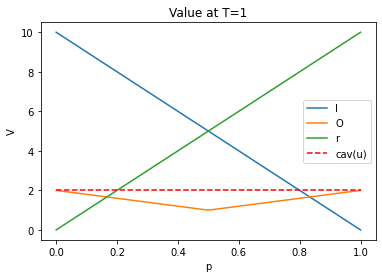

In [20]:
plt.plot(ps, l, label="l")
plt.plot(ps, O, label="O")
plt.plot(ps, r, label="r")
plt.xlabel('p')
plt.ylabel('V')
plt.title("Value at T=1")
plt.hlines(y=O[0], xmin=ps[0], xmax=ps[-1], color='red', linestyles='dashed', label="cav(u)")
plt.legend()

## Get value at initial time step for all Ps (a.k.a. Value of the Game)

In [21]:
ps = np.linspace(0, 1, 1000)
vals = []
actions = []
for p in ps:
    av_game = get_av_val(val_R_T, val_L_T, p)  # value of average game at time T
    av_game_dict = dict(zip(list(a_pairs.flatten()), list(av_game.flatten())))
    val_1, _ = get_prev_val(av_game_dict, a_pairs)
    inter_game = dict(zip(list(a_pairs.flatten()), list(val_1.flatten())))
    val_0, s = get_ini_val(inter_game, a_pairs)
    vals.append(val_0[2, 2]) # initial stage has value at (0, 0) only 
    actions.append(s[2, 2])

Text(0, 0.5, 'u (p)')

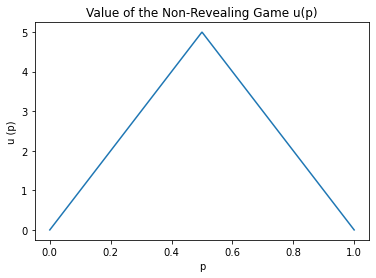

In [22]:
plt.plot(ps, vals)
plt.title('Value of the Non-Revealing Game u(p)')
plt.xlabel('p')
plt.ylabel('u (p)')

## Now lets look at P2's Value

In [16]:
def get_prev_val_2(game_dict, s):  # game dict maps states --> payoff | s - states in grid
    temp = np.full(s.shape, np.nan)
    for i in range(1, 4):
        payoff = np.zeros((2, 2))  # payoff matrix for the game
        payoff[0, 0] = game_dict[s[0, i - 1]]  # left left
        payoff[1, 0] = game_dict[s[4, i - 1]]  # right left
        payoff[0, 1] = game_dict[s[0, i + 1]]  # left right
        payoff[1, 1] = game_dict[s[4, i + 1]]  # right right

        # now find maximin
        temp[1, i] = np.max(np.min(payoff, 0))

    temp[2:4, 1:4] = temp[1, 1:4]  # symmetric

    return temp

In [17]:
# the dual

# for 0<=x<=0.5 u(p) = 10x 
# for 0.5>=x>=1 u(p) = 10 (1-x)
def get_up(p):
    if p <= 0.5:
        return 10*p
    else:
        return 10*(1-p)

# def factor(p):
#     return (1-p)/p

In [39]:
def plot_phat(p): # p is the game defined by nature's probability
    ps_hat = np.linspace(-20, 20, 1001)
    
    val_2_p_t1 = np.zeros((ps_hat.shape[0], a_pairs.shape[0], a_pairs.shape[1]))

    for i in range(len(ps_hat)):
        u = get_up(p)
        p2_hat = (u-p*ps_hat[i])/(1-p)
        min_game = np.minimum(ps_hat[i] - val_L_T, p2_hat - val_R_T)
        min_game_dict = dict(zip(list(a_pairs.flatten()), list(min_game.flatten())))
        val_2_p_t1[i] = get_prev_val_2(min_game_dict, a_pairs)

    val_2_p_t0 = np.zeros((ps_hat.shape[0], 2, 2))

    for i in range(val_2_p_t0.shape[1]):
        for j in range(val_2_p_t0.shape[2]):
            val_2_p_t0[:, i, j] = val_2_p_t1[:, 2*i+1, 2*j+1]

    payoff_t0 = np.zeros(ps_hat.shape[0])
    strategy_t0 = list()

    for i in range(val_2_p_t0.shape[0]):
        payoff_t0[i] = np.max(np.min(val_2_p_t0[i, :, :], 0))
        strategy_t0.append(actions[np.argmax(np.min(val_2_p_t0[i, :, :], 0))])
    
    plt.plot(ps_hat, payoff_t0, label="u")
    # plt.hlines(y=0, xmin=ps_hat[0], xmax=ps_hat[-1], color='red', linestyles='dashed', label="cav(u)")
    plt.vlines(x=10, ymin=np.min(payoff_t0), ymax=np.max(payoff_t0), linestyles='dashed', color='gray')
    plt.vlines(x=-10, ymin=np.min(payoff_t0), ymax=np.max(payoff_t0), linestyles='dashed', color='gray')
    plt.legend(loc='best')
    plt.xlabel('p_hat')
    plt.ylabel('V')
    plt.title(f"Value at T0 for game with p = {p}")
    
    return payoff_t0

(array([-2.00000000e+01, -1.99600000e+01, -1.99200000e+01, ...,
        -9.92000992e-06, -9.96000996e-06, -1.00000100e-05]),
 999999.0)

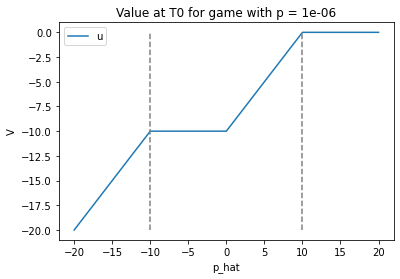

In [53]:
plot_phat(0.000001)

(array([-20.        , -19.96      , -19.92      , ...,  -1.10222222,
         -1.10666667,  -1.11111111]),
 9.0)

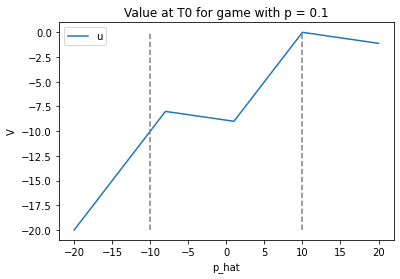

In [54]:
plot_phat(0.1)

(array([-20.        , -19.96      , -19.92      , ...,  -6.61333333,
         -6.64      ,  -6.66666667]),
 1.4999999999999998)

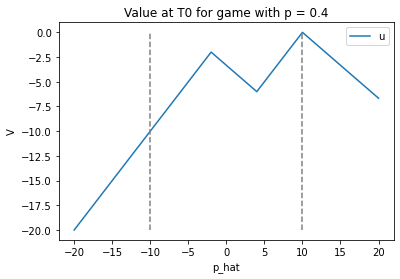

In [42]:
plot_phat(0.4)

(array([-20.  , -19.96, -19.92, ...,  -9.92,  -9.96, -10.  ]), 1.0)

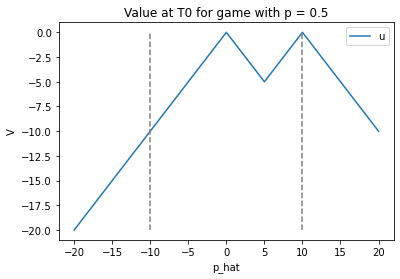

In [47]:
plot_phat(0.5)

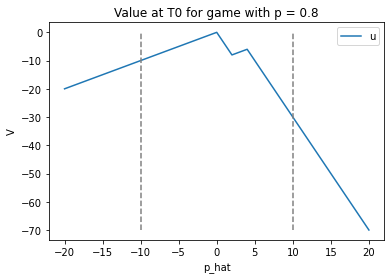

In [50]:
payoff, dv = plot_phat(0.8)

(array([  -20.  ,   -19.96,   -19.92, ..., -1962.08, -1966.04, -1970.  ]),
 0.01010101010101011)

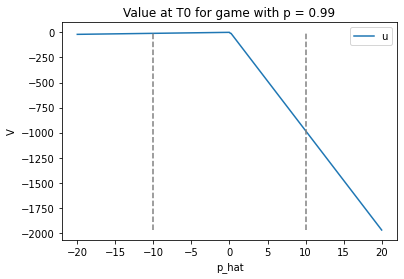

In [46]:
plot_phat(0.99)

In [98]:
p_hat = 10
min_game = np.minimum(p_hat-val_L_T, (10 - p_hat)/3-val_R_T)
min_game_dict = dict(zip(list(a_pairs.flatten()), list(min_game.flatten())))

val_2 = get_prev_val_2(min_game_dict, a_pairs)

printMatrix(min_game)
print('\n')
printMatrix(val_2)

         0     1     2     3     4 
     ------------------------------
  0 |  0.0   0.0   0.0   0.0   0.0 
  1 | -2.0   0.0   0.0   0.0   0.0 
  2 |-10.0  -2.0   0.0   0.0   0.0 
  3 |-10.0 -10.0  -2.0   0.0   0.0 
  4 |-10.0 -10.0 -10.0  -2.0   0.0 


         0     1     2     3     4 
     ------------------------------
  0 |  nan   nan   nan   nan   nan 
  1 |  nan -10.0  -2.0   0.0   nan 
  2 |  nan -10.0  -2.0   0.0   nan 
  3 |  nan -10.0  -2.0   0.0   nan 
  4 |  nan   nan   nan   nan   nan 


## P2's strategy 

In [197]:
ps_hat = np.linspace(-20, 20, 101)
val_2_p_t1 = np.zeros((ps_hat.shape[0], a_pairs.shape[0], a_pairs.shape[1]))

for i in range(len(ps_hat)):
    min_game = np.minimum(ps_hat[i] - val_L_T, (10 - ps_hat[i])/3 - val_R_T)
    min_game_dict = dict(zip(list(a_pairs.flatten()), list(min_game.flatten())))
    val_2_p_t1[i] = get_prev_val_2(min_game_dict, a_pairs)

val_2_p_t0 = np.zeros((ps_hat.shape[0], 2, 2))

for i in range(val_2_p_t0.shape[1]):
    for j in range(val_2_p_t0.shape[2]):
        val_2_p_t0[:, i, j] = val_2_p_t1[:, 2*i+1, 2*j+1]

payoff_t0 = np.zeros(ps_hat.shape[0])
strategy_t0 = list()

for i in range(val_2_p_t0.shape[0]):
    payoff_t0[i] = np.max(np.min(val_2_p_t0[i, :, :], 0))
    strategy_t0.append(actions[np.argmax(np.min(val_2_p_t0[i, :, :], 0))])

In [204]:
len(strategy_t0)

101

Text(0.5, 1.0, 'Value at T0')

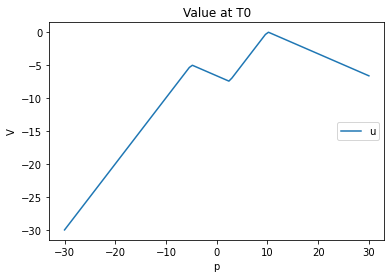

In [38]:
plt.plot(ps_hat, payoff_t0, label="u")
# plt.hlines(y=0, xmin=ps_hat[0], xmax=ps_hat[-1], color='red', linestyles='dashed', label="cav(u)")
plt.legend(loc='right')
plt.xlabel('p')
plt.ylabel('V')
plt.title("Value at T0")

## Now let's consider a "larger" game

In [58]:
num_states = 15
s = np.linspace(1, num_states, num_states)
states = list(itertools.product(s, repeat=2)) # center is (8, 8) ---> (7, 7) indices

In [59]:
# payoff for P1: Type Left
val_L_T = np.zeros((len(s), len(s)))
for i in range(num_states):
    val_L_T[np.triu_indices(num_states, k = i)] = i

In [60]:
val_L_T = val_L_T.reshape(15, 15)
val_R_T = val_L_T.T

In [61]:
printMatrix(val_L_T)

         0     1     2     3     4     5     6     7     8     9    10    11    12    13    14 
     ------------------------------------------------------------------------------------------
  0 |  0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0  10.0  11.0  12.0  13.0  14.0 
  1 |  0.0   0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0  10.0  11.0  12.0  13.0 
  2 |  0.0   0.0   0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0  10.0  11.0  12.0 
  3 |  0.0   0.0   0.0   0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0  10.0  11.0 
  4 |  0.0   0.0   0.0   0.0   0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0  10.0 
  5 |  0.0   0.0   0.0   0.0   0.0   0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0 
  6 |  0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0 
  7 |  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0 
  8 |  0.0   0.0   0.0   0.0   0.0   0.0

In [62]:
printMatrix(val_R_T)

         0     1     2     3     4     5     6     7     8     9    10    11    12    13    14 
     ------------------------------------------------------------------------------------------
  0 |  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0 
  1 |  1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0 
  2 |  2.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0 
  3 |  3.0   2.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0 
  4 |  4.0   3.0   2.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0 
  5 |  5.0   4.0   3.0   2.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0 
  6 |  6.0   5.0   4.0   3.0   2.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0 
  7 |  7.0   6.0   5.0   4.0   3.0   2.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0 
  8 |  8.0   7.0   6.0   5.0   4.0   3.0

In [63]:
average = get_av_val(val_L_T, val_R_T, p=0.5)

In [64]:
printMatrix(average)

         0     1     2     3     4     5     6     7     8     9    10    11    12    13    14 
     ------------------------------------------------------------------------------------------
  0 |  0.0   0.5   1.0   1.5   2.0   2.5   3.0   3.5   4.0   4.5   5.0   5.5   6.0   6.5   7.0 
  1 |  0.5   0.0   0.5   1.0   1.5   2.0   2.5   3.0   3.5   4.0   4.5   5.0   5.5   6.0   6.5 
  2 |  1.0   0.5   0.0   0.5   1.0   1.5   2.0   2.5   3.0   3.5   4.0   4.5   5.0   5.5   6.0 
  3 |  1.5   1.0   0.5   0.0   0.5   1.0   1.5   2.0   2.5   3.0   3.5   4.0   4.5   5.0   5.5 
  4 |  2.0   1.5   1.0   0.5   0.0   0.5   1.0   1.5   2.0   2.5   3.0   3.5   4.0   4.5   5.0 
  5 |  2.5   2.0   1.5   1.0   0.5   0.0   0.5   1.0   1.5   2.0   2.5   3.0   3.5   4.0   4.5 
  6 |  3.0   2.5   2.0   1.5   1.0   0.5   0.0   0.5   1.0   1.5   2.0   2.5   3.0   3.5   4.0 
  7 |  3.5   3.0   2.5   2.0   1.5   1.0   0.5   0.0   0.5   1.0   1.5   2.0   2.5   3.0   3.5 
  8 |  4.0   3.5   3.0   2.5   2.0   1.5